# Back to the physical modes

In [6]:
import h5py
import numpy as np
#import cmath for complex number operations
import cmath
import scipy
import matplotlib
import matplotlib.pyplot as pl
import matplotlib.style as style 
import matplotlib.pyplot as pl

import sys
from contextlib import redirect_stdout
from scipy.optimize import curve_fit
from scipy import interpolate
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset


style.use('tableau-colorblind10')
matplotlib.rcParams.update({'font.size': 12})

In [2]:
#path = "/home/berkane/Documents/stage/simulations/"

# path to work from personal computer
path = "/home/angela/Documents/stage/simulations/"

# Results for alpha_lit=0.01
sx_res = h5py.File(path+"coherence_time/extended_results.jld", "r")
sz_res = h5py.File(path+"spin_boson_alpha_s/extended_results.jld", "r")

# Results for alpha_lit=0.05
sx_strong = h5py.File(path+"sx/extended_results.jld", "r")
sz_strong = h5py.File(path+"sz/extended_results.jld", "r")

# Results for alpha_lit=0.3
sz_s3 = h5py.File(path+"pair_corr_super/extended_results.jld", "r")
sx_s3 = h5py.File(path+"pair_corr_super_sx/extended_results.jld", "r")

N = 120
M = 700
beta = ["2.0", "20.0", "200.0", "2000.0"]
s = ["0.5", "1.0", "2.0", "3.0", "4.0", "5.0"]
smin = ["1.0", "2.0", "3.0", "4.0", "5.0"]
snew = ["0.5", "1.0", "2.0", "3.0", "4.0"]

tem = ["10", "50", "80", "100"]

In [3]:
list(sz_s3["2.0/3.0"].keys())

['bond_dims',
 'bond_dims_1',
 'bond_dims_2',
 'bond_dims_3',
 'bond_dims_4',
 'chain_occup_1',
 'chain_occup_2',
 'chain_occup_3',
 'chain_occup_4',
 'coeff_c',
 'coeff_e',
 'coeff_t',
 'constr_matr_1',
 'constr_matr_2',
 'constr_matr_3',
 'constr_matr_4',
 'corr_constr_1',
 'corr_constr_2',
 'corr_constr_3',
 'corr_constr_4',
 'corr_destr_1',
 'corr_destr_2',
 'corr_destr_3',
 'corr_destr_4',
 'destr_matr_1',
 'destr_matr_2',
 'destr_matr_3',
 'destr_matr_4',
 'mean_constr_1',
 'mean_constr_2',
 'mean_constr_3',
 'mean_constr_4',
 'mean_destr_1',
 'mean_destr_2',
 'mean_destr_3',
 'mean_destr_4',
 'occup_1',
 'occup_2',
 'occup_3',
 'occup_4',
 'omega',
 'pair_matr_constr_1',
 'pair_matr_constr_2',
 'pair_matr_constr_3',
 'pair_matr_constr_4',
 'pair_matr_destr_1',
 'pair_matr_destr_2',
 'pair_matr_destr_3',
 'pair_matr_destr_4',
 'sx',
 'sz',
 'times']

In [5]:
fold = ["s=2_beta=2/", "s=2_beta=2000/"]
inve = ["2.0", "2000.0"]


count = 0
for fol in fold:
    with open(fol + 'occup.dat', 'w') as f:
        with redirect_stdout(f):
            print(list(sz_res[inve[count]+"/2.0/occup_4"][()]))
    with open(fol + 'omega.dat', 'w') as f:
        with redirect_stdout(f):
            print(list(sz_res[inve[count]+"/2.0/omega"][()]))
    with open(fol + 'constr.dat', 'w') as f:
        with redirect_stdout(f):
            print(list(sz_res[inve[count]+"/2.0/corr_constr_4"][()]))
    with open(fol + 'destr.dat', 'w') as f:
        with redirect_stdout(f):
            print(list(sz_res[inve[count]+"/2.0/corr_constr_4"][()]))
    count+=1

FileNotFoundError: [Errno 2] No such file or directory: 's=2_beta=2/occup.dat'

In [7]:
sys.getsizeof(sz_res["2.0/2.0/corr_constr_4"][()])

7840128

In [8]:
def cosine(omega, bet):
    return 1/np.sqrt(1-np.exp(-omega*float(bet)))

def sine(omega, bet):
    return 1/np.sqrt(-1+np.exp(omega*float(bet)))

def physical_occup(res, b, s, t):
    corr_constr = res[b+"/"+s+"/corr_constr_"+t][()]    
    corr_destr = res[b+"/"+s+"/corr_destr_"+t][()]
    occup = res[b+"/"+s+"/occup_"+t][()]
    omega = res[b+"/"+s+"/omega"][()]
    
    x = np.linspace(-1, 1, M)
    y = np.linspace(-1, 1, M)
    #X, Y = np.meshgrid(x, y)

    occup_new = interpolate.interp1d(omega, occup, kind='linear', fill_value='extrapolate')
    #print(occup_new(x))
    corr_constr = interpolate.interp2d(omega, omega, abs(corr_constr), kind='linear')
    #corr_constr_new = corr_constr(x, y) 
    corr_destr = interpolate.interp2d(omega, omega, abs(corr_destr), kind='linear')
    #corr_destr_new = corr_destr(x, y)
    
    Mhalf = int(M*0.5)
    phys_occ = []
    for el in range(1,Mhalf+1):
        ipos = int(M*0.5)+el-1
        ineg = int(M*0.5)-el
        occ = (cosine(x[ipos],b)*sine(x[ipos],b)*(corr_destr(x[ineg],x[ipos]) + corr_constr(x[ipos],x[ineg])) 
                    + cosine(x[ipos], b)**2*(occup_new(x[ipos])) + sine(x[ipos], b)**2*(1+occup_new(x[ineg])))
        phys_occ.append(occ)
        
    return np.squeeze(phys_occ)

In [13]:
def occup_plot(x, occ, title, lims, zoom, inplot, time):
    fig, ax = pl.subplots(figsize=[8,5])
    for i in range(len(occ)):
        pl.plot(x, occ[i], label=r"$\omega_ct=$"+time[i])
    pl.title(title)
    pl.xlabel(r"$\omega$")
    pl.ylabel(r"$\langle \hat n_\omega \rangle$")
    pl.grid(False)
    pl.legend(loc="lower right")
    #ax = pl.gca()
    #ax.set_ylim([0.9, 1.5])
    if(inplot==True):
        axins = zoomed_inset_axes(ax, zoom, loc="upper right") # zoom = 6
        for i in range(len(occ)):
            axins.plot(x, occ[i])
            # sub region of the original image
        x1, x2, y1, y2 = lims
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        pl.xticks(visible=True)
        pl.yticks(visible=False)

        # draw a bbox of the region of the inset axes in the parent axes and
        # connecting lines between the bbox and the inset axes area
        mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

    pl.show()

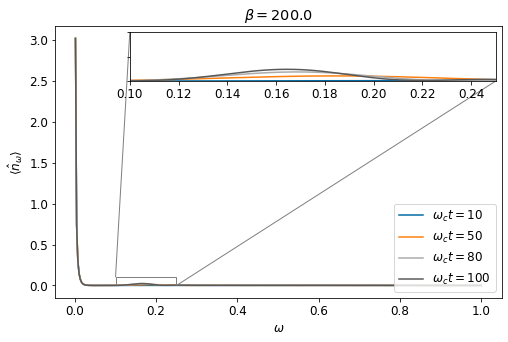

/tmp/ipykernel_35546/2878366357.py:5: RuntimeWarning: overflow encountered in exp
  return 1/np.sqrt(-1+np.exp(omega*float(bet)))


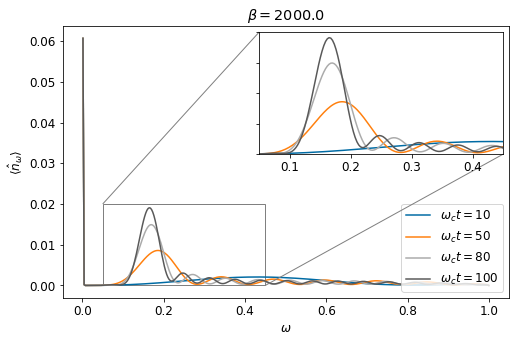

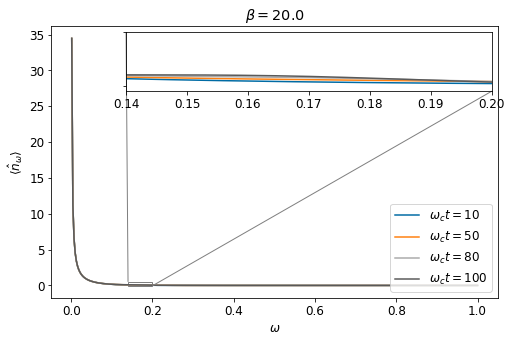

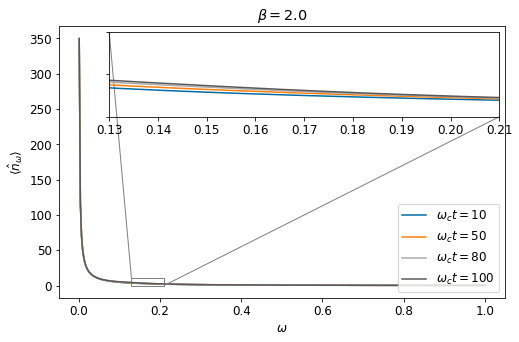

In [14]:
Mhalf = int(M*0.5)
x = np.linspace(-1, 1, 700)


lims = 0.1, 0.25, 0., 0.1
y1 = physical_occup(sz_res, "200.0", "2.0", "1")
y2 = physical_occup(sz_res, "200.0", "2.0", "2")
y3 = physical_occup(sz_res, "200.0", "2.0", "3")
y4 = physical_occup(sz_res, "200.0", "2.0", "4")
occup_plot(x[Mhalf:M], [y1, y2, y3, y4], r"$\beta=200.0$", lims, 6, True, tem)

lims = 0.05, 0.45, 0., 0.02
y1 = physical_occup(sz_res, "2000.0", "2.0", "1")
y2 = physical_occup(sz_res, "2000.0", "2.0", "2")
y3 = physical_occup(sz_res, "2000.0", "2.0", "3")
y4 = physical_occup(sz_res, "2000.0", "2.0", "4")
occup_plot(x[Mhalf:M], [y1, y2, y3, y4], r"$\beta=2000.0$", lims, 1.5, True, tem)

lims = 0.14, 0.2, -0.05, 0.5
y1 = physical_occup(sz_res, "20.0", "2.0", "1")
y2 = physical_occup(sz_res, "20.0", "2.0", "2")
y3 = physical_occup(sz_res, "20.0", "2.0", "3")
y4 = physical_occup(sz_res, "20.0", "2.0", "4")
occup_plot(x[Mhalf:M], [y1, y2, y3, y4], r"$\beta=20.0$", lims, 15, True, tem)

lims = 0.13, 0.21, 0., 10
y1 = physical_occup(sz_res, "2.0", "2.0", "1")
y2 = physical_occup(sz_res, "2.0", "2.0", "2")
y3 = physical_occup(sz_res, "2.0", "2.0", "3")
y4 = physical_occup(sz_res, "2.0", "2.0", "4")
occup_plot(x[Mhalf:M], [y1, y2, y3, y4], r"$\beta=2.0$", lims, 12, True, tem)

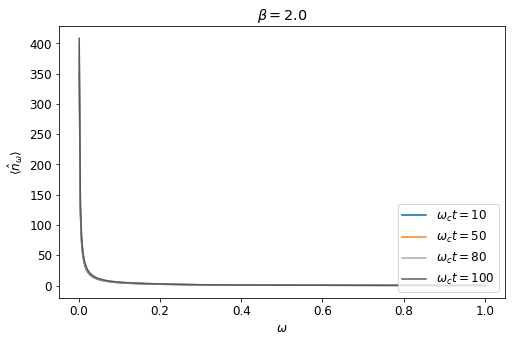

In [18]:
lims = 
y = [physical_occup(sz_res, "2.0", "1.0", "1"),
         physical_occup(sz_res, "2.0", "1.0", "2"), 
         physical_occup(sz_res, "2.0", "1.0", "3"), 
         physical_occup(sz_res, "2.0", "1.0", "4")]
occup_plot(x[Mhalf:M], y, r"$\beta=2.0$", lims, 2.5, False, tem)

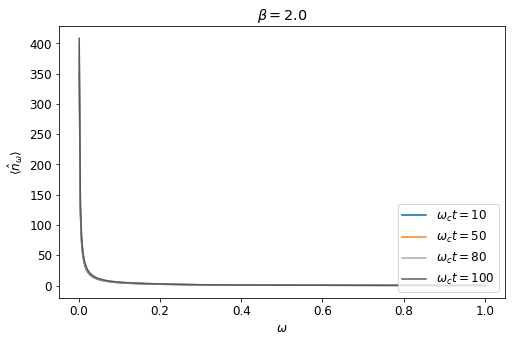

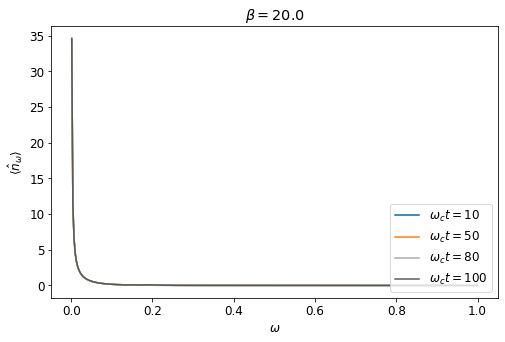

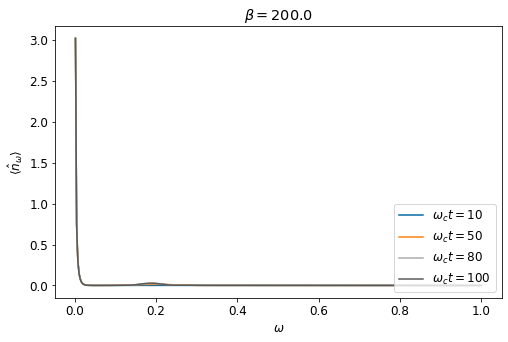

/tmp/ipykernel_35546/2878366357.py:5: RuntimeWarning: overflow encountered in exp
  return 1/np.sqrt(-1+np.exp(omega*float(bet)))


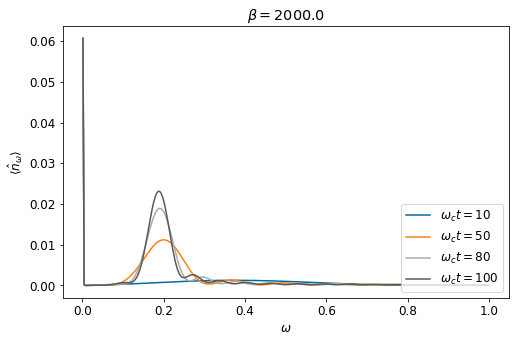

In [15]:
for el in beta:
    y = [physical_occup(sz_res, el, "1.0", "1"),
         physical_occup(sz_res, el, "1.0", "2"), 
         physical_occup(sz_res, el, "1.0", "3"), 
         physical_occup(sz_res, el, "1.0", "4")]
    occup_plot(x[Mhalf:M], y, r"$\beta=$"+el, lims, 2.5, False, tem)

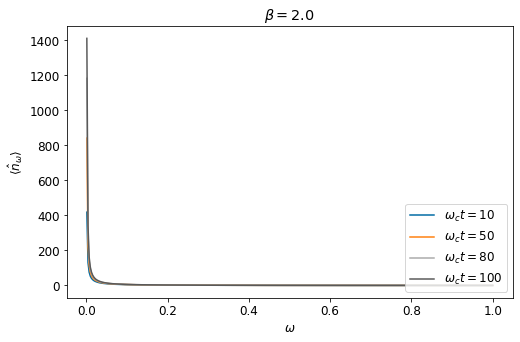

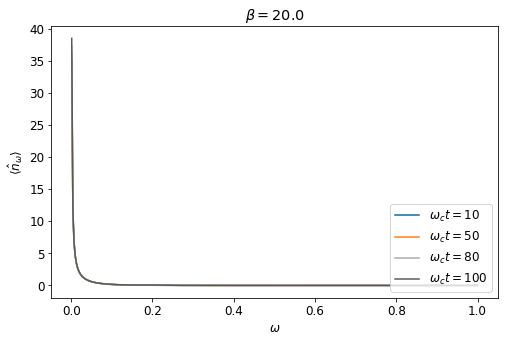

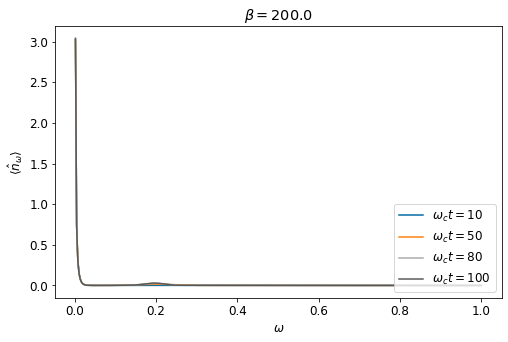

/tmp/ipykernel_35546/2878366357.py:5: RuntimeWarning: overflow encountered in exp
  return 1/np.sqrt(-1+np.exp(omega*float(bet)))


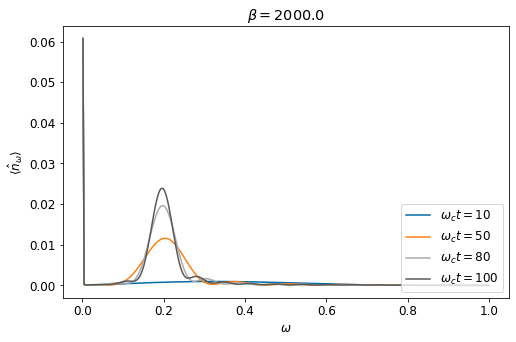

In [16]:
for el in beta:
    y = [physical_occup(sz_res, el, "0.5", "1"),
         physical_occup(sz_res, el, "0.5", "2"), 
         physical_occup(sz_res, el, "0.5", "3"), 
         physical_occup(sz_res, el, "0.5", "4")]
    occup_plot(x[Mhalf:M], y, r"$\beta=$"+el, lims, 2.5, False, tem)

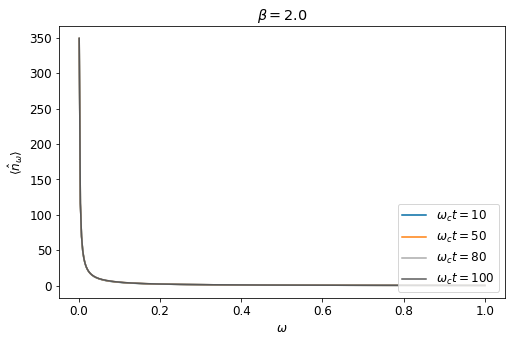

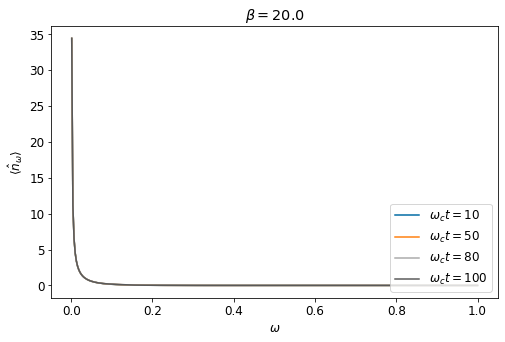

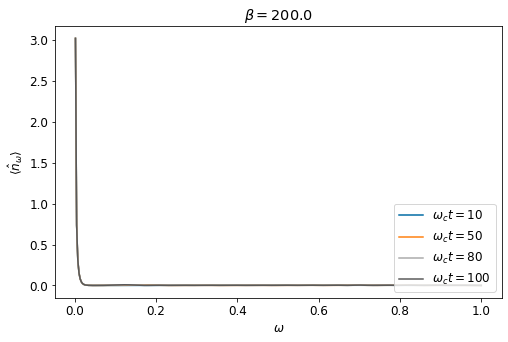

/tmp/ipykernel_35546/2878366357.py:5: RuntimeWarning: overflow encountered in exp
  return 1/np.sqrt(-1+np.exp(omega*float(bet)))


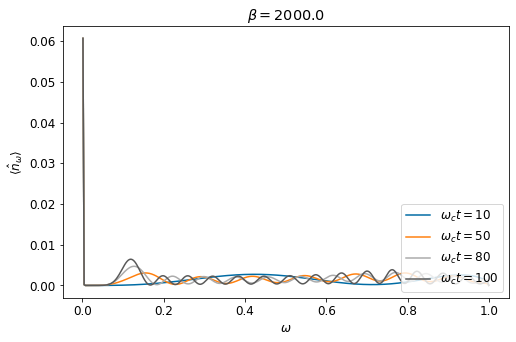

In [17]:
for el in beta:
        y = [physical_occup(sz_res, el, "3.0", "1"),
             physical_occup(sz_res, el, "3.0", "2"), 
             physical_occup(sz_res, el, "3.0", "3"), 
             physical_occup(sz_res, el, "3.0", "4")]
        occup_plot(x[Mhalf:M], y, r"$\beta=$"+el, lims, 2.5, False, tem)

In [93]:
x = np.linspace(-1, 1, 700)
x[int(M*0.5)-1]


-0.0014306151645206988

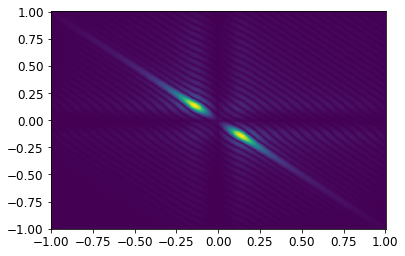

In [72]:
constr_matr = sx_res["2.0/2.0/constr_matr_4"][()]
pair_constr = sx_res["2.0/2.0/corr_constr_4"][()]   
omega = sx_res["2.0/2.0/omega"][()]



x = np.linspace(-1, 1, 700)
y = np.linspace(-1, 1, 700)
X, Y = np.meshgrid(x, y)

fconstr = interpolate.interp2d(omega, omega, abs(pair_constr), kind='linear')
Z = fconstr(x, y)

pl.pcolormesh(X, Y, Z, shading='auto')
pl.show()

In [64]:
f(0.5, 0)*2

array([0.00034234])